In [2]:
import warnings 

warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [4]:
plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [13]:
# Covid_case.csv 파일에서 필요데이터만 불러와 'Covid_data_new' DataFrame에 저장

covid_data=pd.read_csv('data/Covid_case.csv')
covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401,2441.0,2021,9
2021-09-24,3269.0,295132,2434.0,2021,9
2021-09-23,2433.0,292699,2427.0,2021,9
2021-09-22,1716.0,290983,2419.0,2021,9
2021-09-21,1720.0,289263,2413.0,2021,9


In [14]:
# Covid_data_new의 datily_decideCnt를 100단위로 번주화

covid_data_new['categorize_100']=covid_data_new.daily_decideCnt//100
covid_data_new.tail()

,daily_decideCnt,decideCnt,deathCnt,year,month,categorize_100
stateDt,,,,,,
2020-02-04,3.0,16,0.0,2020,2,0.0
2020-02-03,1.0,15,0.0,2020,2,0.0
2020-02-02,13.0,2,2.0,2020,2,0.0
2020-02-01,2.0,0,0.0,2020,2,0.0
2020-01-01,0.0,0,0.0,2020,1,0.0


In [15]:
covid_data_new.categorize_100.describe()

count    603.000000
mean       4.499171
std        5.499132
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       32.000000
Name: categorize_100, dtype: float64

32개의 범위로 범주화되었다

In [5]:
#분기별 교통량 데이터 불러오기
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

#분기별 교통량 데이터 합치기
traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

#교통량 데이터 필요 칼럼만 추출
traffic_data.index=pd.to_datetime(traffic_data['집계일자'],format='%Y%m%d')
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]

#불규칙 업소명 통일화
traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275
2018-01-01,가락,615,14,5,14,96,26,770
2018-01-01,가락(개),2358,31,48,57,131,273,2898
2018-01-01,가락(개),7148,27,71,27,267,378,7918
2018-01-01,가락(개),2946,29,52,48,150,357,3582


# 전국 교통량&코로나 범주화

In [16]:
# 전국 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744


코로나19 발생 이전의 교통량은 평균 6.8*10^6이었다.

In [17]:
#교통량 데이터와 코로나19 확진자수 데이터를 날짜를 기준으로 병합

data_mart_total=covid_data_new.join(traffic_data_total, how='right')
data_mart_total['date']=data_mart_total.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_total['day_of_week']=data_mart_total.index.dayofweek
data_mart_total.day_of_week=data_mart_total.day_of_week.apply(lambda x : days[x])
data_mart_total.decideCnt=data_mart_total.decideCnt.fillna(0)
data_mart_total.daily_decideCnt=data_mart_total.daily_decideCnt.fillna(0)
data_mart_total.deathCnt=data_mart_total.deathCnt.fillna(0)
data_mart_total['year']=data_mart_total.index.year
data_mart_total['month']=data_mart_total.index.month
data_mart_total['categorize_100']=data_mart_total.daily_decideCnt//100
data_mart_total.head()

,daily_decideCnt,decideCnt,deathCnt,year,month,categorize_100,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,date,day_of_week
집계일자,,,,,,,,,,,,,,,
2018-01-01,0.0,0.0,0.0,2018,1,0.0,5562671,64729,140284,36796,34705,240045,6079230,2018-01-01,MON
2018-01-02,0.0,0.0,0.0,2018,1,0.0,4945308,200328,257620,163881,234282,290196,6091615,2018-01-02,TUE
2018-01-03,0.0,0.0,0.0,2018,1,0.0,4841053,232174,293244,212214,294425,289377,6162487,2018-01-03,WED
2018-01-04,0.0,0.0,0.0,2018,1,0.0,4902656,232305,293413,209227,300632,291083,6229316,2018-01-04,THU
2018-01-05,0.0,0.0,0.0,2018,1,0.0,5342859,233726,299322,209493,299666,310678,6695744,2018-01-05,FRI


<AxesSubplot:xlabel='categorize_100', ylabel='count'>

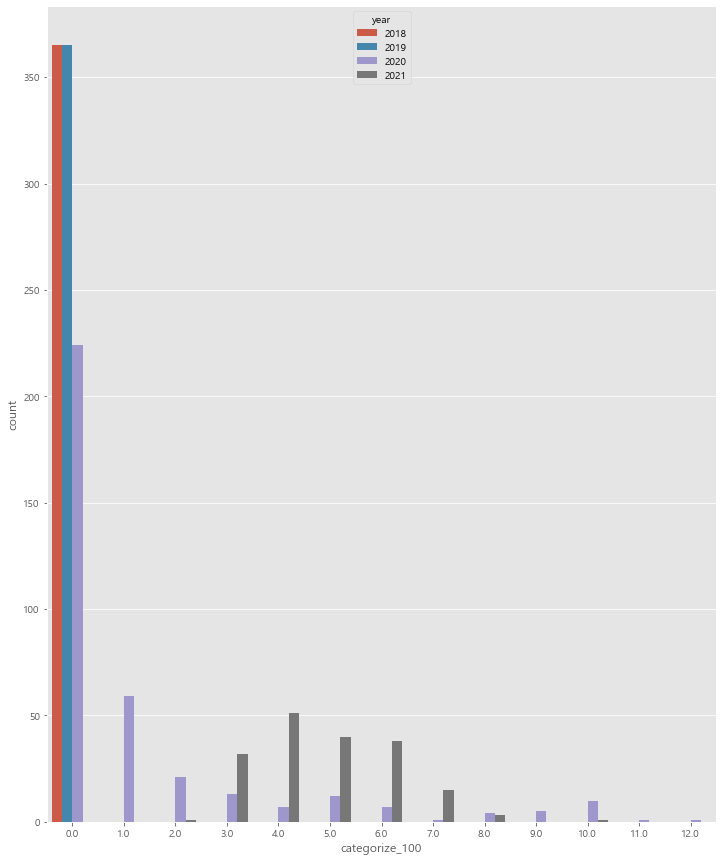

In [18]:
plt.figure(figsize=(12,15))
sns.countplot(x='categorize_100',data=data_mart_total,hue='year')

대부분은 확진자수 값은 0~12의 범주에 있다

<AxesSubplot:xlabel='categorize_100', ylabel='1종교통량'>

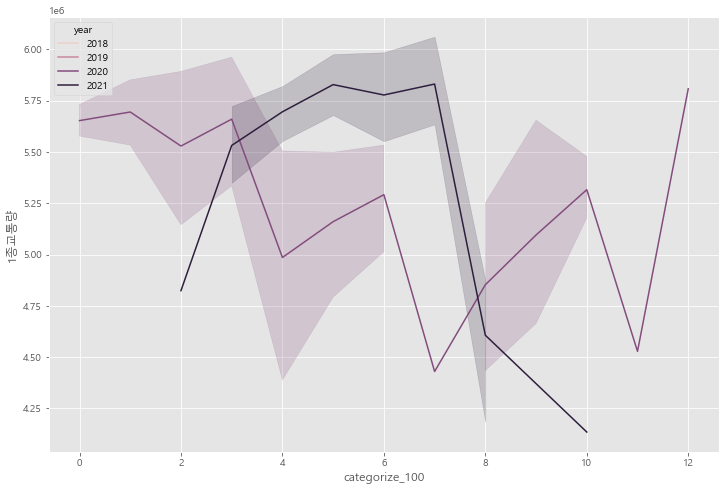

In [19]:
#확진자수에 따른 평균 1종교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='1종교통량',data=data_mart_total,hue='year')

<AxesSubplot:xlabel='categorize_100', ylabel='총교통량'>

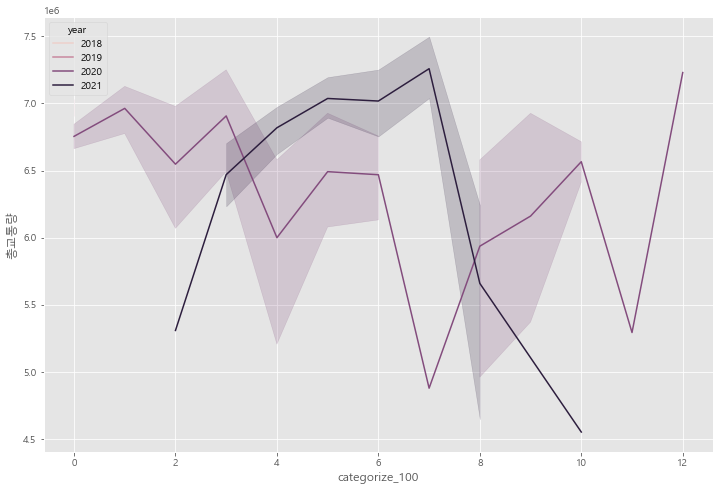

In [20]:
#확진자수에 따른 평균 총교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='총교통량',data=data_mart_total,hue='year')

# 서울 교통량&코로나 범주화

In [5]:
seoul_covid_data=pd.read_csv('data/서울시 코로나19 확진자 현황.csv',encoding='utf8')
seoul_covid_data=pd.DataFrame(seoul_covid_data.groupby('확진일').count()['연번'])
seoul_covid_data.columns=['daily_decideCnt']
seoul_covid_data['categorize_100']=seoul_covid_data.daily_decideCnt//100
seoul_covid_data.index=pd.to_datetime(seoul_covid_data.index)
seoul_covid_data.tail()

,daily_decideCnt,categorize_100
확진일,,
2021-10-04,521,5
2021-10-05,689,6
2021-10-06,836,8
2021-10-07,775,7
2021-10-08,712,7


In [65]:
#2020년도 교통량 합산

Seoul_Traffic_2020_1=pd.read_csv('data/2020_Seoul_Traffic/01월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_2=pd.read_csv('data/2020_Seoul_Traffic/02월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_3=pd.read_csv('data/2020_Seoul_Traffic/03월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_4=pd.read_csv('data/2020_Seoul_Traffic/04월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_5=pd.read_csv('data/2020_Seoul_Traffic/05월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_6=pd.read_csv('data/2020_Seoul_Traffic/06월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_7=pd.read_csv('data/2020_Seoul_Traffic/07월 서울시 교통량 조사자료.csv',encoding='utf8')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_8=pd.read_csv('data/2020_Seoul_Traffic/08월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_9=pd.read_csv('data/2020_Seoul_Traffic/09월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_10=pd.read_csv('data/2020_Seoul_Traffic/10월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_11=pd.read_csv('data/2020_Seoul_Traffic/11월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020_12=pd.read_csv('data/2020_Seoul_Traffic/12월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2020=pd.concat([Seoul_Traffic_2020_1, Seoul_Traffic_2020_2,Seoul_Traffic_2020_3, Seoul_Traffic_2020_4,
                             Seoul_Traffic_2020_5,Seoul_Traffic_2020_6,Seoul_Traffic_2020_7,Seoul_Traffic_2020_8,
                             Seoul_Traffic_2020_9,Seoul_Traffic_2020_10,Seoul_Traffic_2020_11,Seoul_Traffic_2020_12])
Seoul_Traffic_2020=Seoul_Traffic_2020.groupby('일자').sum()
Seoul_Traffic_2020.index=pd.to_datetime(Seoul_Traffic_2020.index.astype(int),format='%Y%m%d')
Seoul_Traffic_2020['Total_Traffic']=Seoul_Traffic_2020['0시']+Seoul_Traffic_2020['1시']+Seoul_Traffic_2020['2시']+Seoul_Traffic_2020['3시']+Seoul_Traffic_2020['4시']+Seoul_Traffic_2020['5시']+Seoul_Traffic_2020['6시']+Seoul_Traffic_2020['7시']+Seoul_Traffic_2020['8시']+Seoul_Traffic_2020['9시']+Seoul_Traffic_2020['10시']+Seoul_Traffic_2020['11시']+Seoul_Traffic_2020['12시']+Seoul_Traffic_2020['13시']+Seoul_Traffic_2020['14시']+Seoul_Traffic_2020['15시']+Seoul_Traffic_2020['16시']+Seoul_Traffic_2020['17시']+Seoul_Traffic_2020['18시']+Seoul_Traffic_2020['19시']+Seoul_Traffic_2020['20시']+Seoul_Traffic_2020['21시']+Seoul_Traffic_2020['22시']+Seoul_Traffic_2020['23시']
Seoul_Traffic_2020=pd.DataFrame(Seoul_Traffic_2020['Total_Traffic'])

In [66]:
#2021년 교통량 합산

Seoul_Traffic_2021_1=pd.read_csv('data/2021_Seoul_Traffic/01월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_2=pd.read_csv('data/2021_Seoul_Traffic/02월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_3=pd.read_csv('data/2021_Seoul_Traffic/03월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_4=pd.read_csv('data/2021_Seoul_Traffic/04월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_5=pd.read_csv('data/2021_Seoul_Traffic/05월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_6=pd.read_csv('data/2021_Seoul_Traffic/06월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_7=pd.read_csv('data/2021_Seoul_Traffic/07월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021_8=pd.read_csv('data/2021_Seoul_Traffic/08월 서울시 교통량 조사자료.csv',encoding='cp949')[['일자','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']]
Seoul_Traffic_2021=pd.concat([Seoul_Traffic_2021_1, Seoul_Traffic_2021_2,Seoul_Traffic_2021_3, Seoul_Traffic_2021_4,
                             Seoul_Traffic_2021_5,Seoul_Traffic_2021_6,Seoul_Traffic_2021_7,Seoul_Traffic_2021_8])
Seoul_Traffic_2021=Seoul_Traffic_2021.groupby('일자').sum()
Seoul_Traffic_2021.index=pd.to_datetime(Seoul_Traffic_2021.index.astype(int),format='%Y%m%d')
Seoul_Traffic_2021['Total_Traffic']=Seoul_Traffic_2021['0시']+Seoul_Traffic_2021['1시']+Seoul_Traffic_2021['2시']+Seoul_Traffic_2021['3시']+Seoul_Traffic_2021['4시']+Seoul_Traffic_2021['5시']+Seoul_Traffic_2021['6시']+Seoul_Traffic_2021['7시']+Seoul_Traffic_2021['8시']+Seoul_Traffic_2021['9시']+Seoul_Traffic_2021['10시']+Seoul_Traffic_2021['11시']+Seoul_Traffic_2021['12시']+Seoul_Traffic_2021['13시']+Seoul_Traffic_2021['14시']+Seoul_Traffic_2021['15시']+Seoul_Traffic_2021['16시']+Seoul_Traffic_2021['17시']+Seoul_Traffic_2021['18시']+Seoul_Traffic_2021['19시']+Seoul_Traffic_2021['20시']+Seoul_Traffic_2021['21시']+Seoul_Traffic_2021['22시']+Seoul_Traffic_2021['23시']
Seoul_Traffic_2021=pd.DataFrame(Seoul_Traffic_2021['Total_Traffic'])

In [67]:
#2021-2021년 교통량 concat

Seoul_Traffic=pd.concat([Seoul_Traffic_2020, Seoul_Traffic_2021])
Seoul_Traffic

,Total_Traffic
일자,
2020-01-01,7347299.0
2020-01-02,9326734.0
2020-01-03,9998638.0
2020-01-04,9198233.0
2020-01-05,7868358.0
...,...
2021-08-27,9506229.0
2021-08-28,8748341.0
2021-08-29,7473739.0


In [58]:
data_mart_seoul=seoul_covid_data.join(Seoul_Traffic, how='right')
data_mart_seoul['date']=data_mart_seoul.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_seoul['day_of_week']=data_mart_seoul.index.dayofweek
data_mart_seoul.day_of_week=data_mart_seoul.day_of_week.apply(lambda x : days[x])
data_mart_seoul['year']=data_mart_seoul.index.year
data_mart_seoul['month']=data_mart_seoul.index.month
data_mart_seoul.daily_decideCnt=data_mart_seoul.daily_decideCnt.fillna(0)
data_mart_seoul['categorize_100']=data_mart_seoul.daily_decideCnt//100
data_mart_seoul

,daily_decideCnt,categorize_100,Total_Traffic,date,day_of_week,year,month
일자,,,,,,,
2020-01-01,0.0,0.0,7347299.0,2020-01-01,WED,2020,1
2020-01-02,0.0,0.0,9326734.0,2020-01-02,THU,2020,1
2020-01-03,0.0,0.0,9998638.0,2020-01-03,FRI,2020,1
2020-01-04,0.0,0.0,9198233.0,2020-01-04,SAT,2020,1
2020-01-05,0.0,0.0,7868358.0,2020-01-05,SUN,2020,1
...,...,...,...,...,...,...,...
2021-08-27,569.0,5.0,9506229.0,2021-08-27,FRI,2021,8
2021-08-28,517.0,5.0,8748341.0,2021-08-28,SAT,2021,8
2021-08-29,442.0,4.0,7473739.0,2021-08-29,SUN,2021,8


<AxesSubplot:xlabel='categorize_100', ylabel='count'>

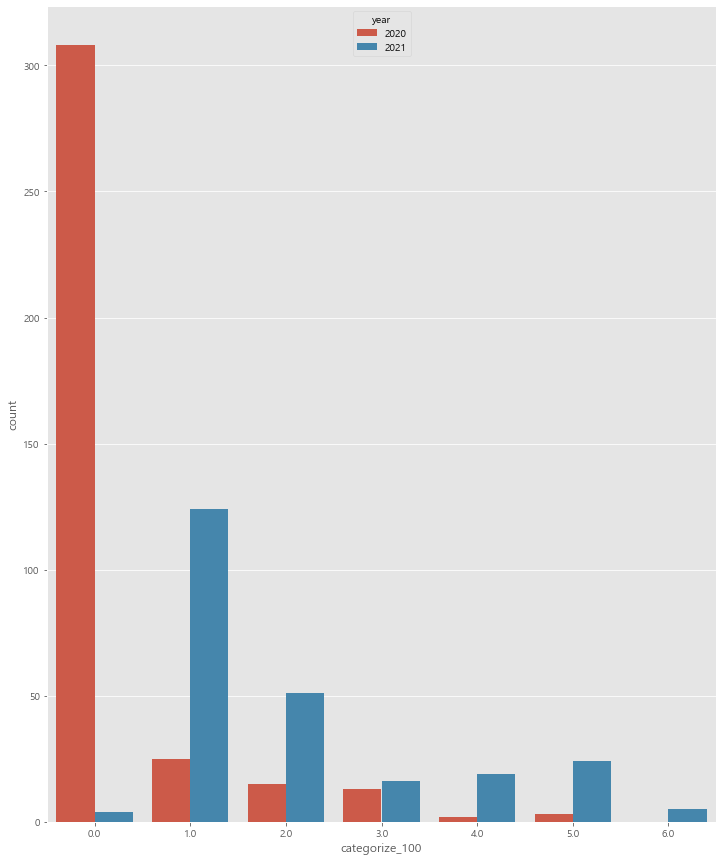

In [74]:
plt.figure(figsize=(12,15))
sns.countplot(x='categorize_100',data=data_mart_seoul,hue='year')

<AxesSubplot:xlabel='month', ylabel='Total_Traffic'>

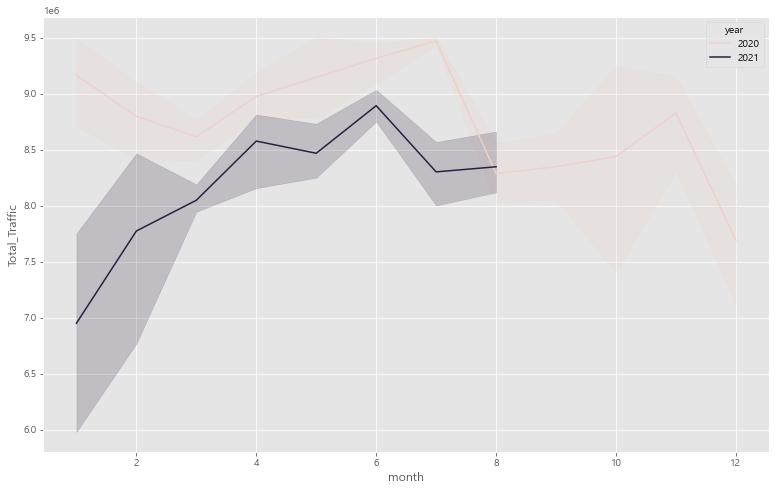

In [76]:
# 달별, 연도별 교통량

plt.figure(figsize=(13,8))
sns.lineplot(x='month',y='Total_Traffic', hue='year',data=data_mart_seoul[data_mart_seoul.day_of_week=='SAT'])

<AxesSubplot:xlabel='categorize_100', ylabel='Total_Traffic'>

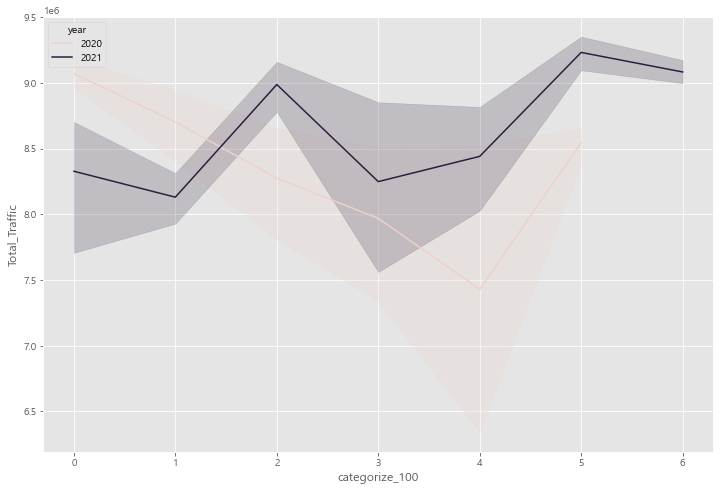

In [62]:
#확진자수에 따른 평균 총교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='Total_Traffic',data=data_mart_seoul,hue='year')

In [73]:
#좀 더 세분화해보자(50단위로 나누기)

data_mart_seoul['categorize_50']=data_mart_seoul.daily_decideCnt//50
data_mart_seoul

,daily_decideCnt,categorize_100,Total_Traffic,date,day_of_week,year,month,categorize_50
일자,,,,,,,,
2020-01-01,0.0,0.0,7347299.0,2020-01-01,WED,2020,1,0.0
2020-01-02,0.0,0.0,9326734.0,2020-01-02,THU,2020,1,0.0
2020-01-03,0.0,0.0,9998638.0,2020-01-03,FRI,2020,1,0.0
2020-01-04,0.0,0.0,9198233.0,2020-01-04,SAT,2020,1,0.0
2020-01-05,0.0,0.0,7868358.0,2020-01-05,SUN,2020,1,0.0
...,...,...,...,...,...,...,...,...
2021-08-27,569.0,5.0,9506229.0,2021-08-27,FRI,2021,8,11.0
2021-08-28,517.0,5.0,8748341.0,2021-08-28,SAT,2021,8,10.0
2021-08-29,442.0,4.0,7473739.0,2021-08-29,SUN,2021,8,8.0


<AxesSubplot:xlabel='categorize_50', ylabel='count'>

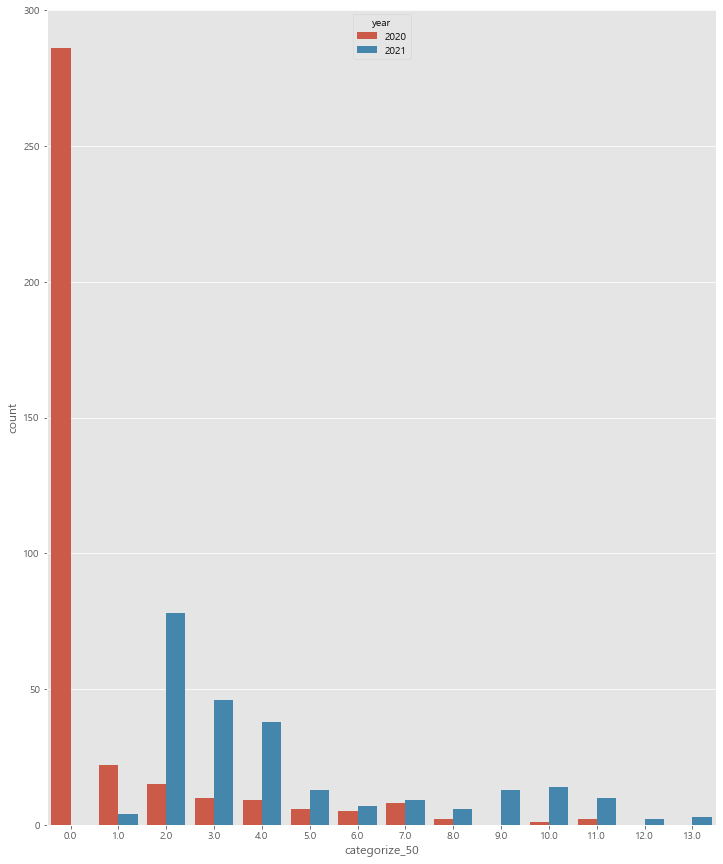

In [75]:
plt.figure(figsize=(12,15))
sns.countplot(x='categorize_50',data=data_mart_seoul,hue='year')

<AxesSubplot:xlabel='categorize_50', ylabel='Total_Traffic'>

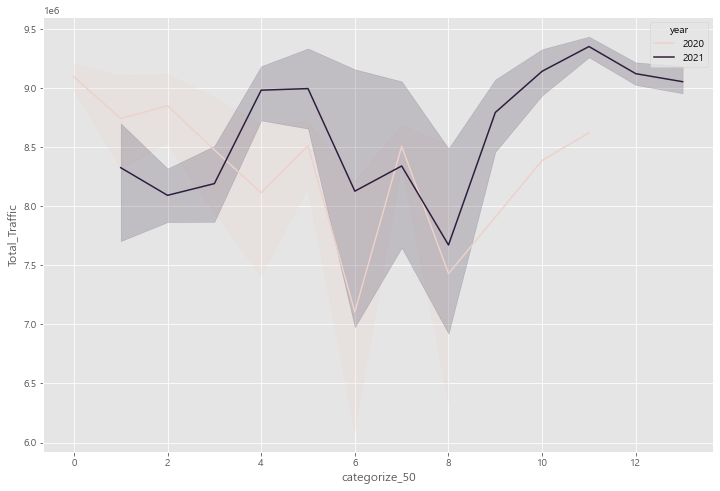

In [77]:
#확진자수에 따른 평균 총교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_50', y='Total_Traffic',data=data_mart_seoul,hue='year')

# 대구 교통량&코로나 범주화

In [97]:
daegu_traffic_data=traffic_data[(traffic_data.영업소명=='서대구')|(traffic_data.영업소명=='북대구')|(traffic_data.영업소명=='남대구')].groupby('집계일자').sum()
daegu_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,
2018-01-01,158432,1384,3607,712,516,5847,170498
2018-01-02,161220,6162,7056,3431,3685,7883,189437
2018-01-03,160008,7111,8303,4490,4598,7705,192215
2018-01-04,161046,6983,8325,4443,4951,7736,193484
2018-01-05,174056,7281,8340,4325,5110,8321,207433


<AxesSubplot:xlabel='categorize_100', ylabel='count'>

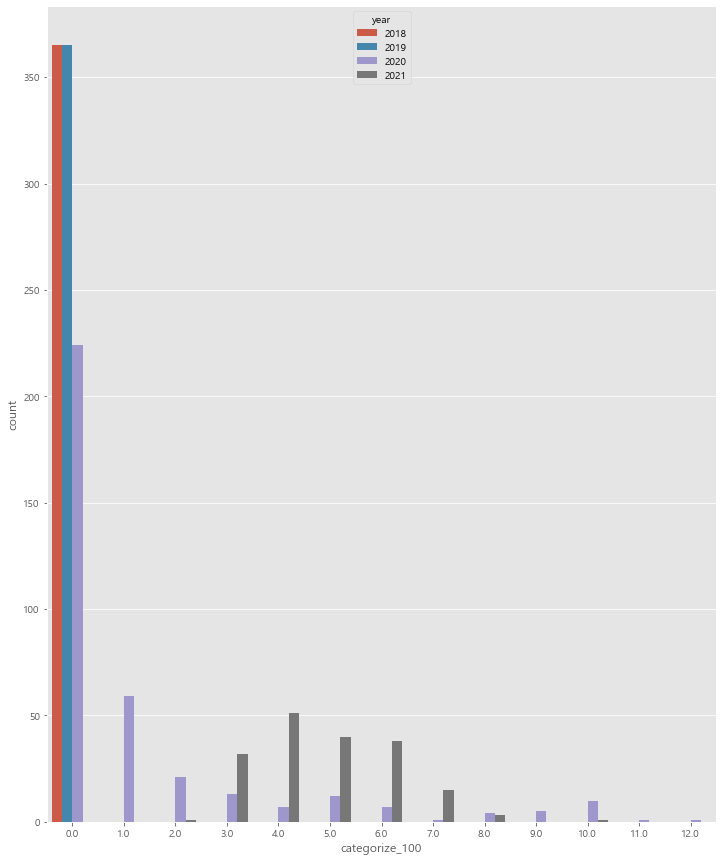

In [102]:
plt.figure(figsize=(12,15))
sns.countplot(x='categorize_100',data=data_mart_daegu,hue='year')

In [98]:
data_mart_daegu=covid_data_new.join(daegu_traffic_data, how='right')
data_mart_daegu['date']=data_mart_daegu.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_daegu['day_of_week']=data_mart_daegu.index.dayofweek
data_mart_daegu.day_of_week=data_mart_daegu.day_of_week.apply(lambda x : days[x])
data_mart_daegu.decideCnt=data_mart_daegu.decideCnt.fillna(0)
data_mart_daegu.daily_decideCnt=data_mart_daegu.daily_decideCnt.fillna(0)
data_mart_daegu.deathCnt=data_mart_daegu.deathCnt.fillna(0)
data_mart_daegu['year']=data_mart_daegu.index.year
data_mart_daegu['month']=data_mart_daegu.index.month
data_mart_daegu['categorize_100']=data_mart_daegu.daily_decideCnt//100
data_mart_daegu.head()

,daily_decideCnt,decideCnt,deathCnt,year,month,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,date,day_of_week,categorize_100
집계일자,,,,,,,,,,,,,,,
2018-01-01,0.0,0.0,0.0,2018,1,158432,1384,3607,712,516,5847,170498,2018-01-01,MON,0.0
2018-01-02,0.0,0.0,0.0,2018,1,161220,6162,7056,3431,3685,7883,189437,2018-01-02,TUE,0.0
2018-01-03,0.0,0.0,0.0,2018,1,160008,7111,8303,4490,4598,7705,192215,2018-01-03,WED,0.0
2018-01-04,0.0,0.0,0.0,2018,1,161046,6983,8325,4443,4951,7736,193484,2018-01-04,THU,0.0
2018-01-05,0.0,0.0,0.0,2018,1,174056,7281,8340,4325,5110,8321,207433,2018-01-05,FRI,0.0


<AxesSubplot:xlabel='categorize_100', ylabel='1종교통량'>

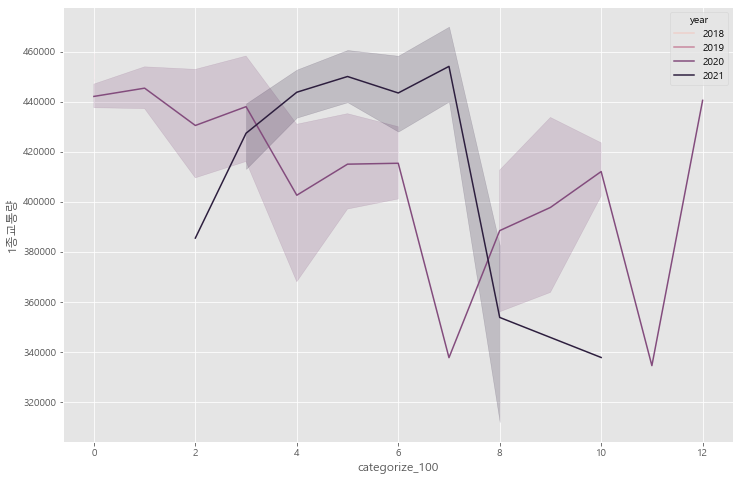

In [99]:
#확진자수에 따른 평균 1종교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='1종교통량',data=data_mart_seoul,hue='year')

<AxesSubplot:xlabel='categorize_100', ylabel='총교통량'>

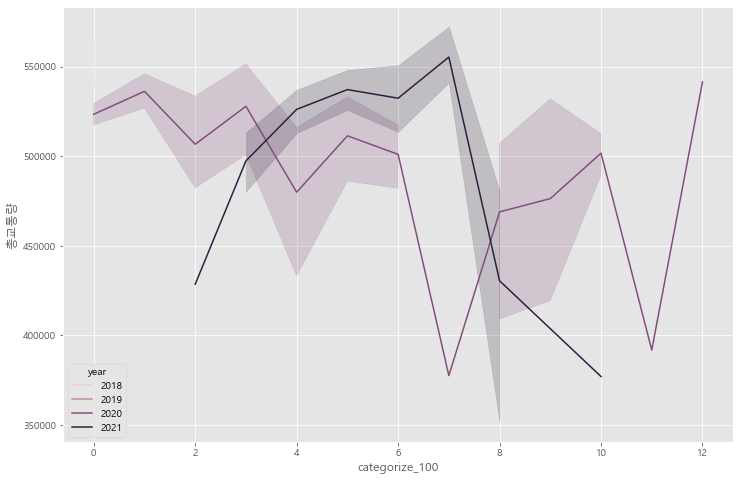

In [100]:
#확진자수에 따른 평균 총교통량

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='총교통량',data=data_mart_seoul,hue='year')